------------------------------------------------------------------------------------------
Converting ras files to csv files and plotting...

ras files have been converted to csv files that are saved to the csv folder.            
Plots have been saved to the png and pdf folders.
------------------------------------------------------------------------------------------


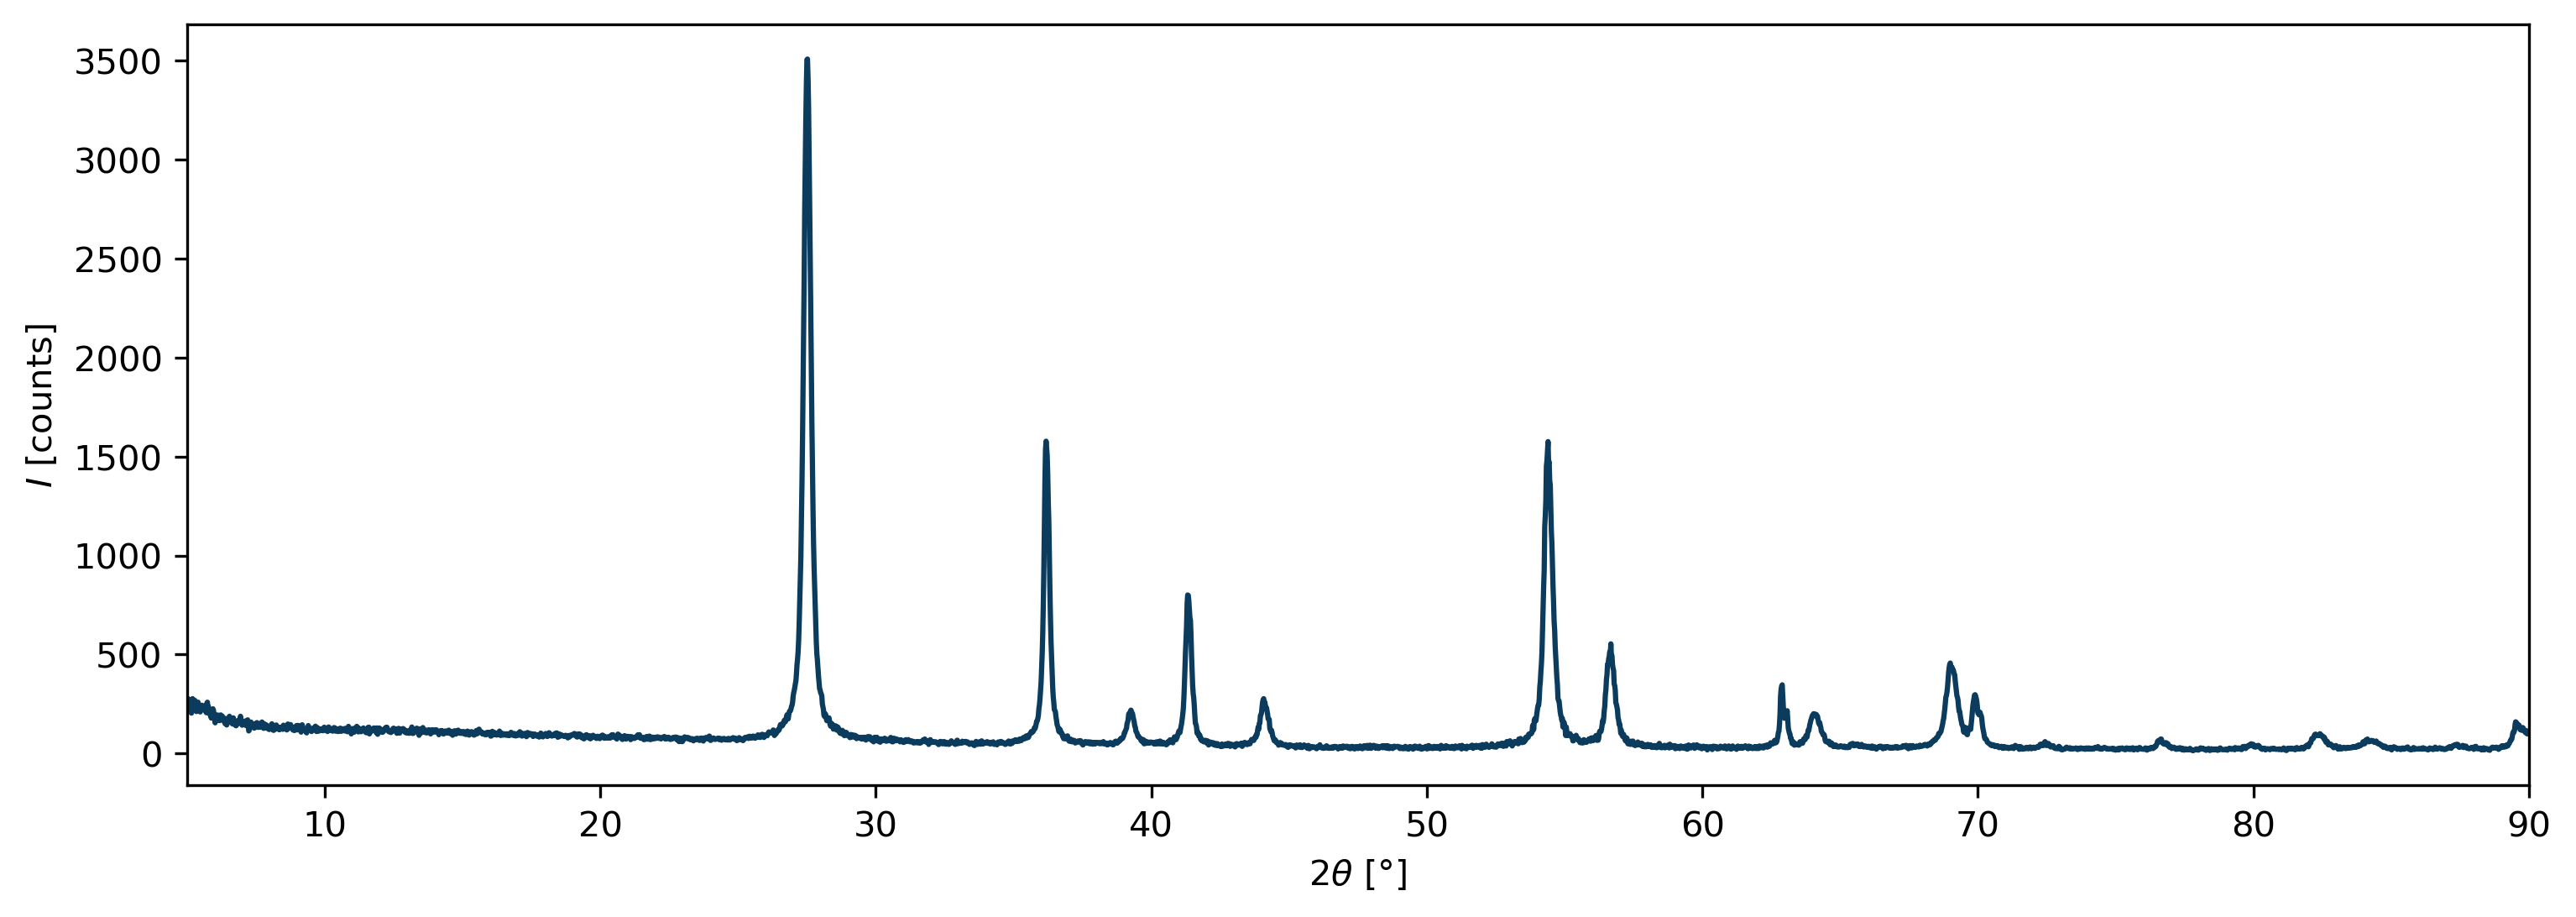

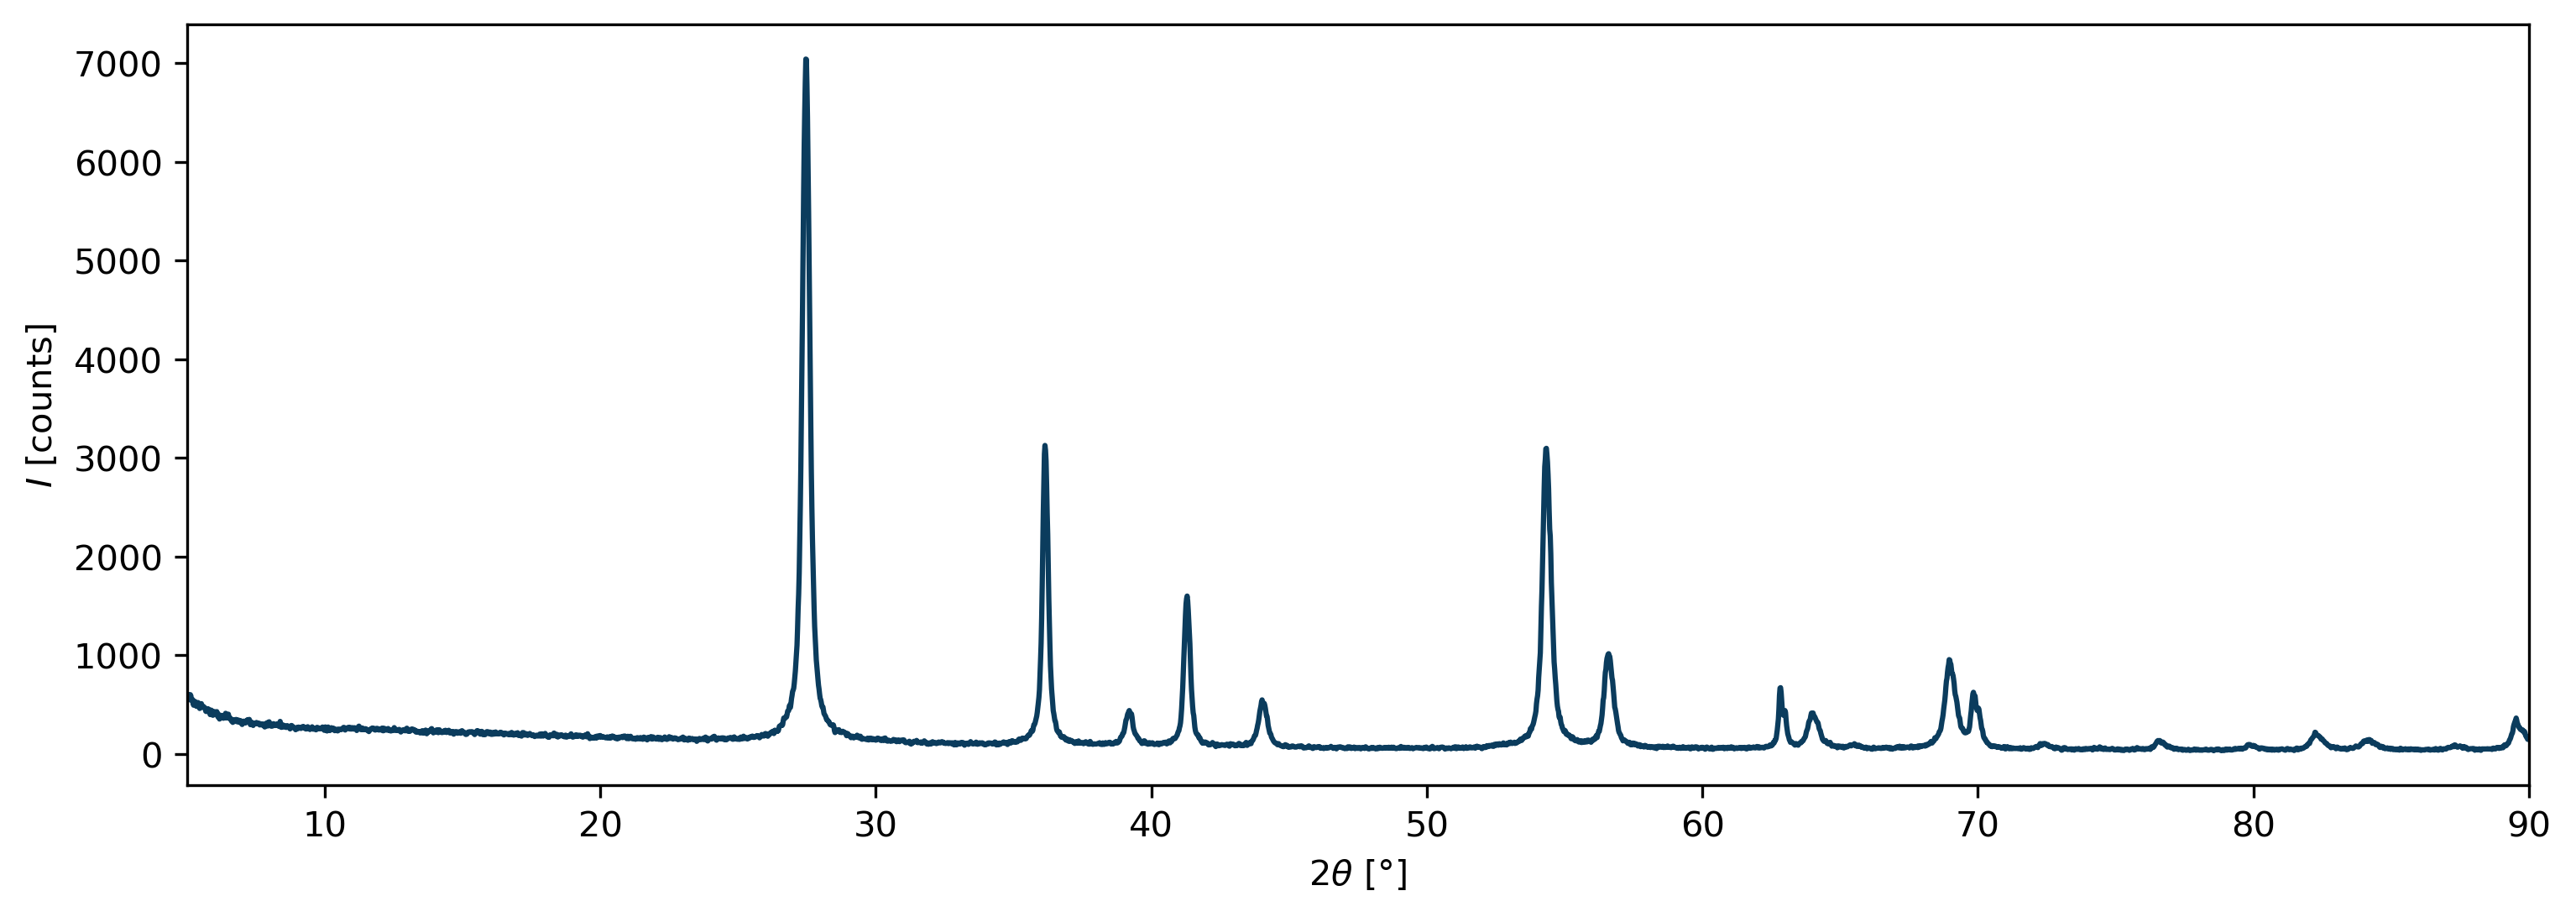

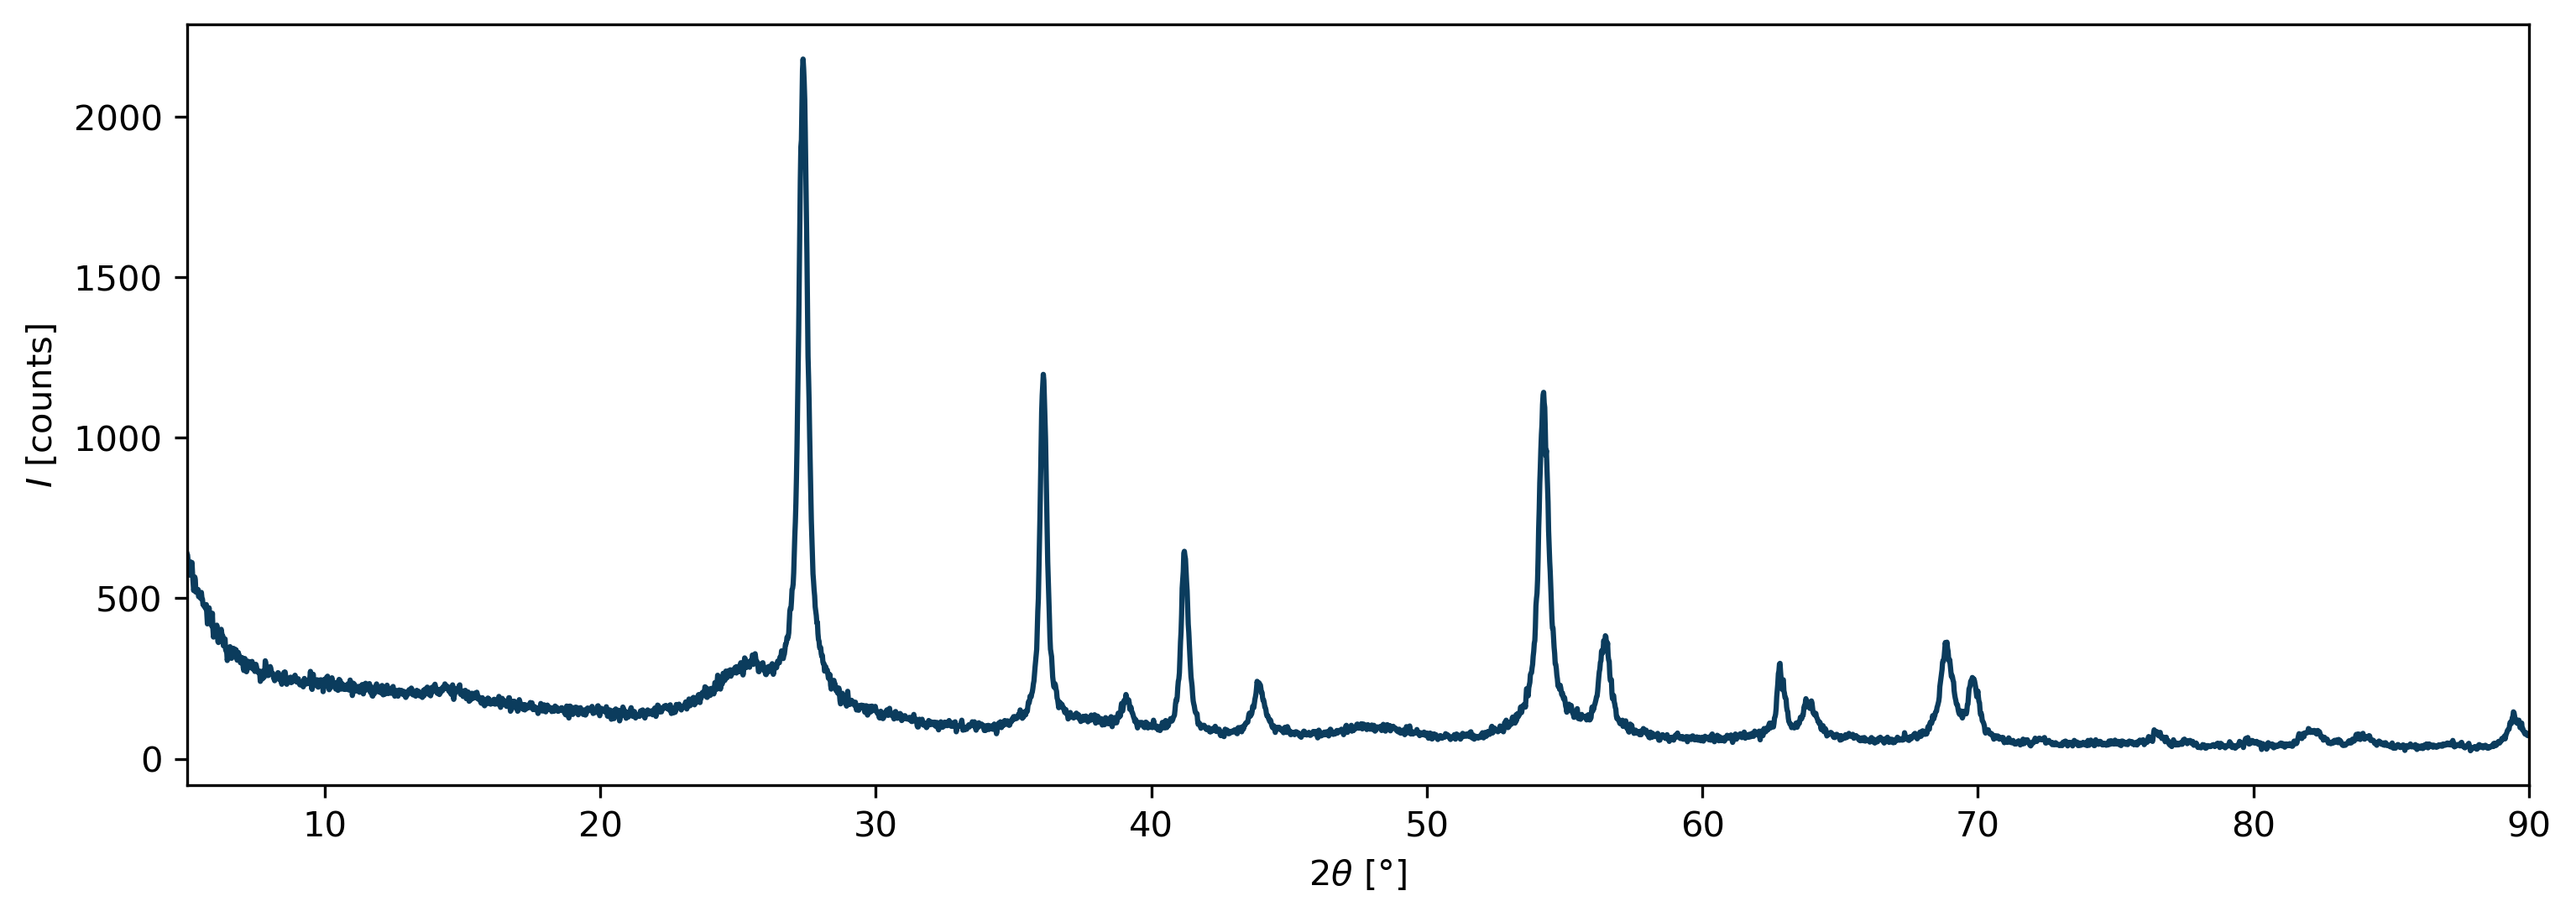

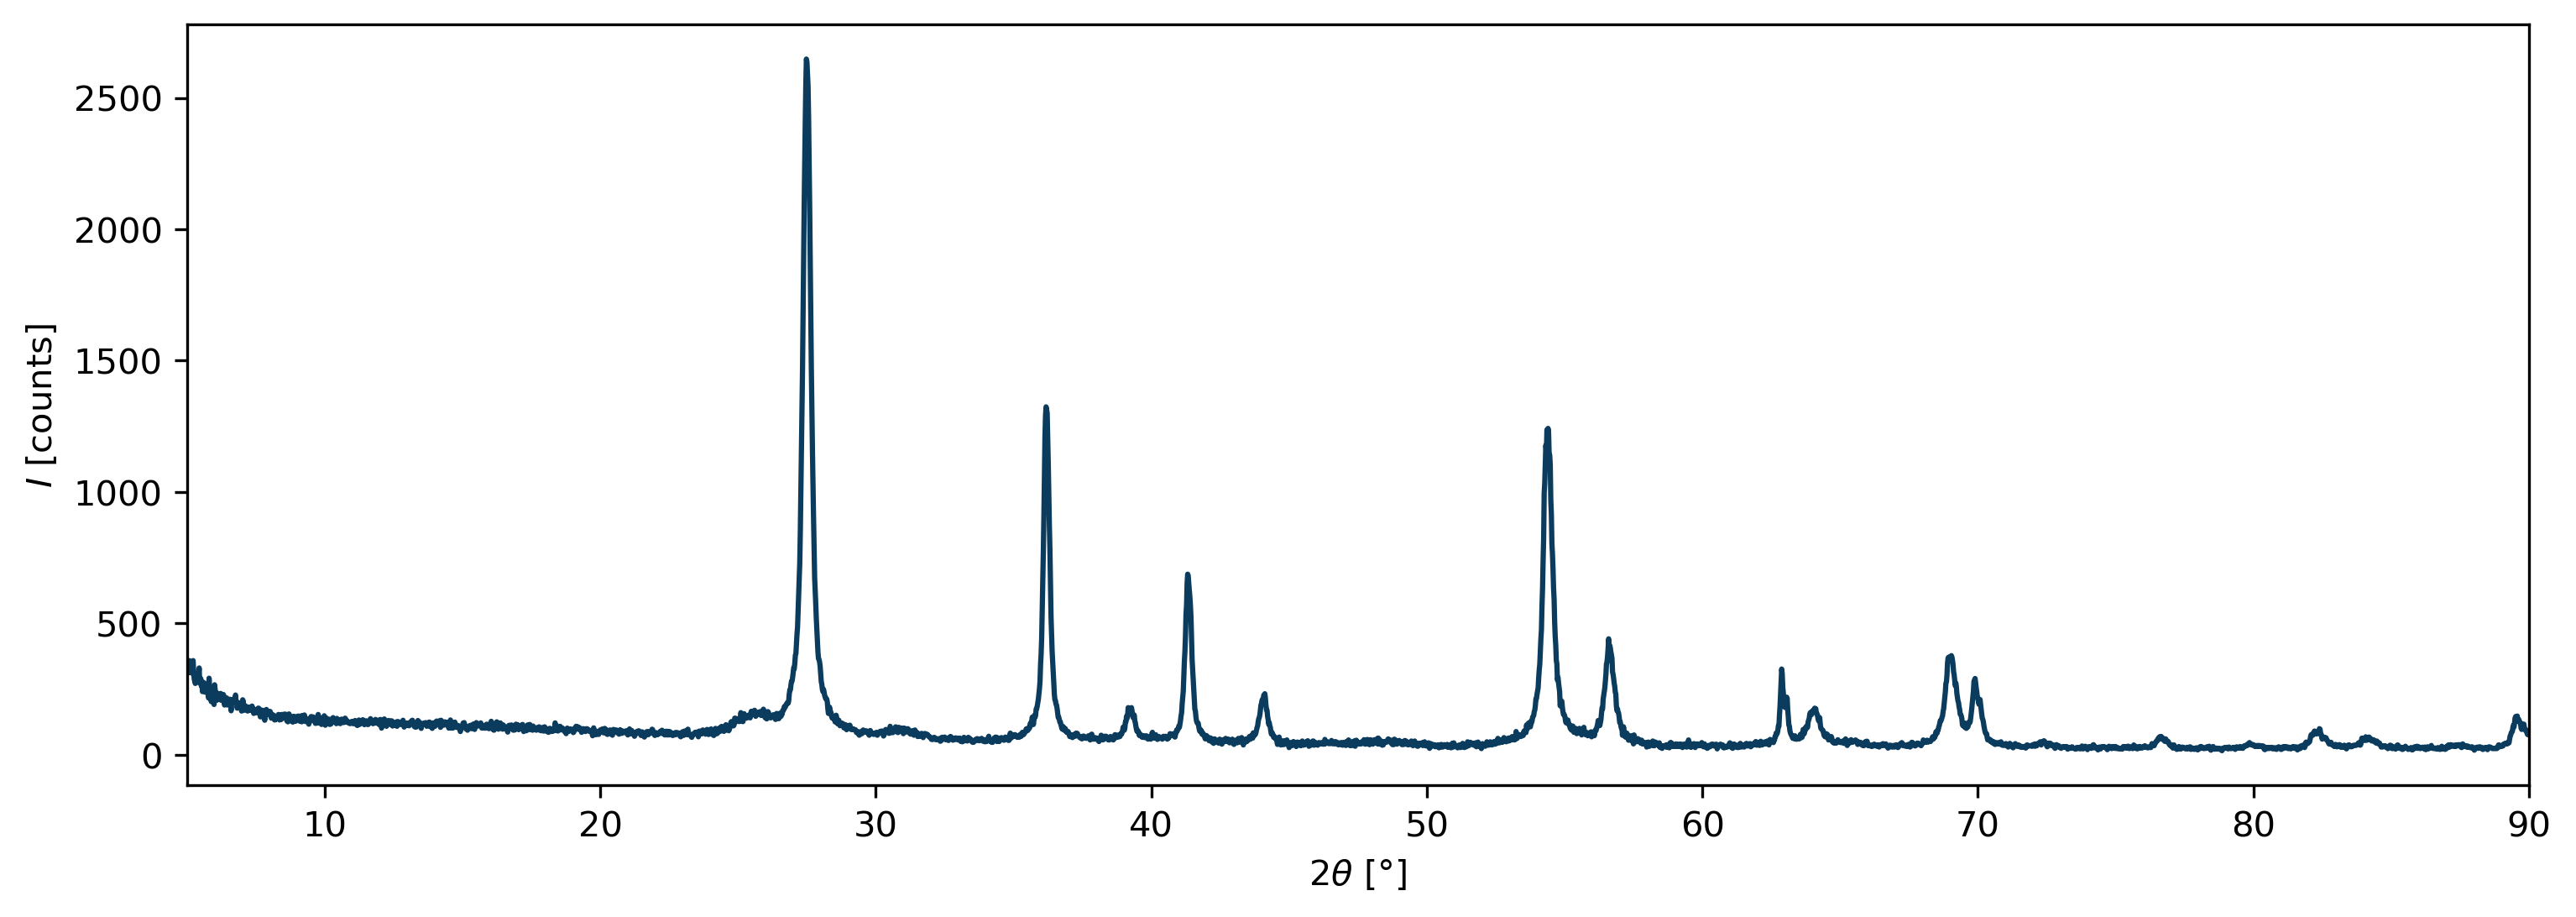

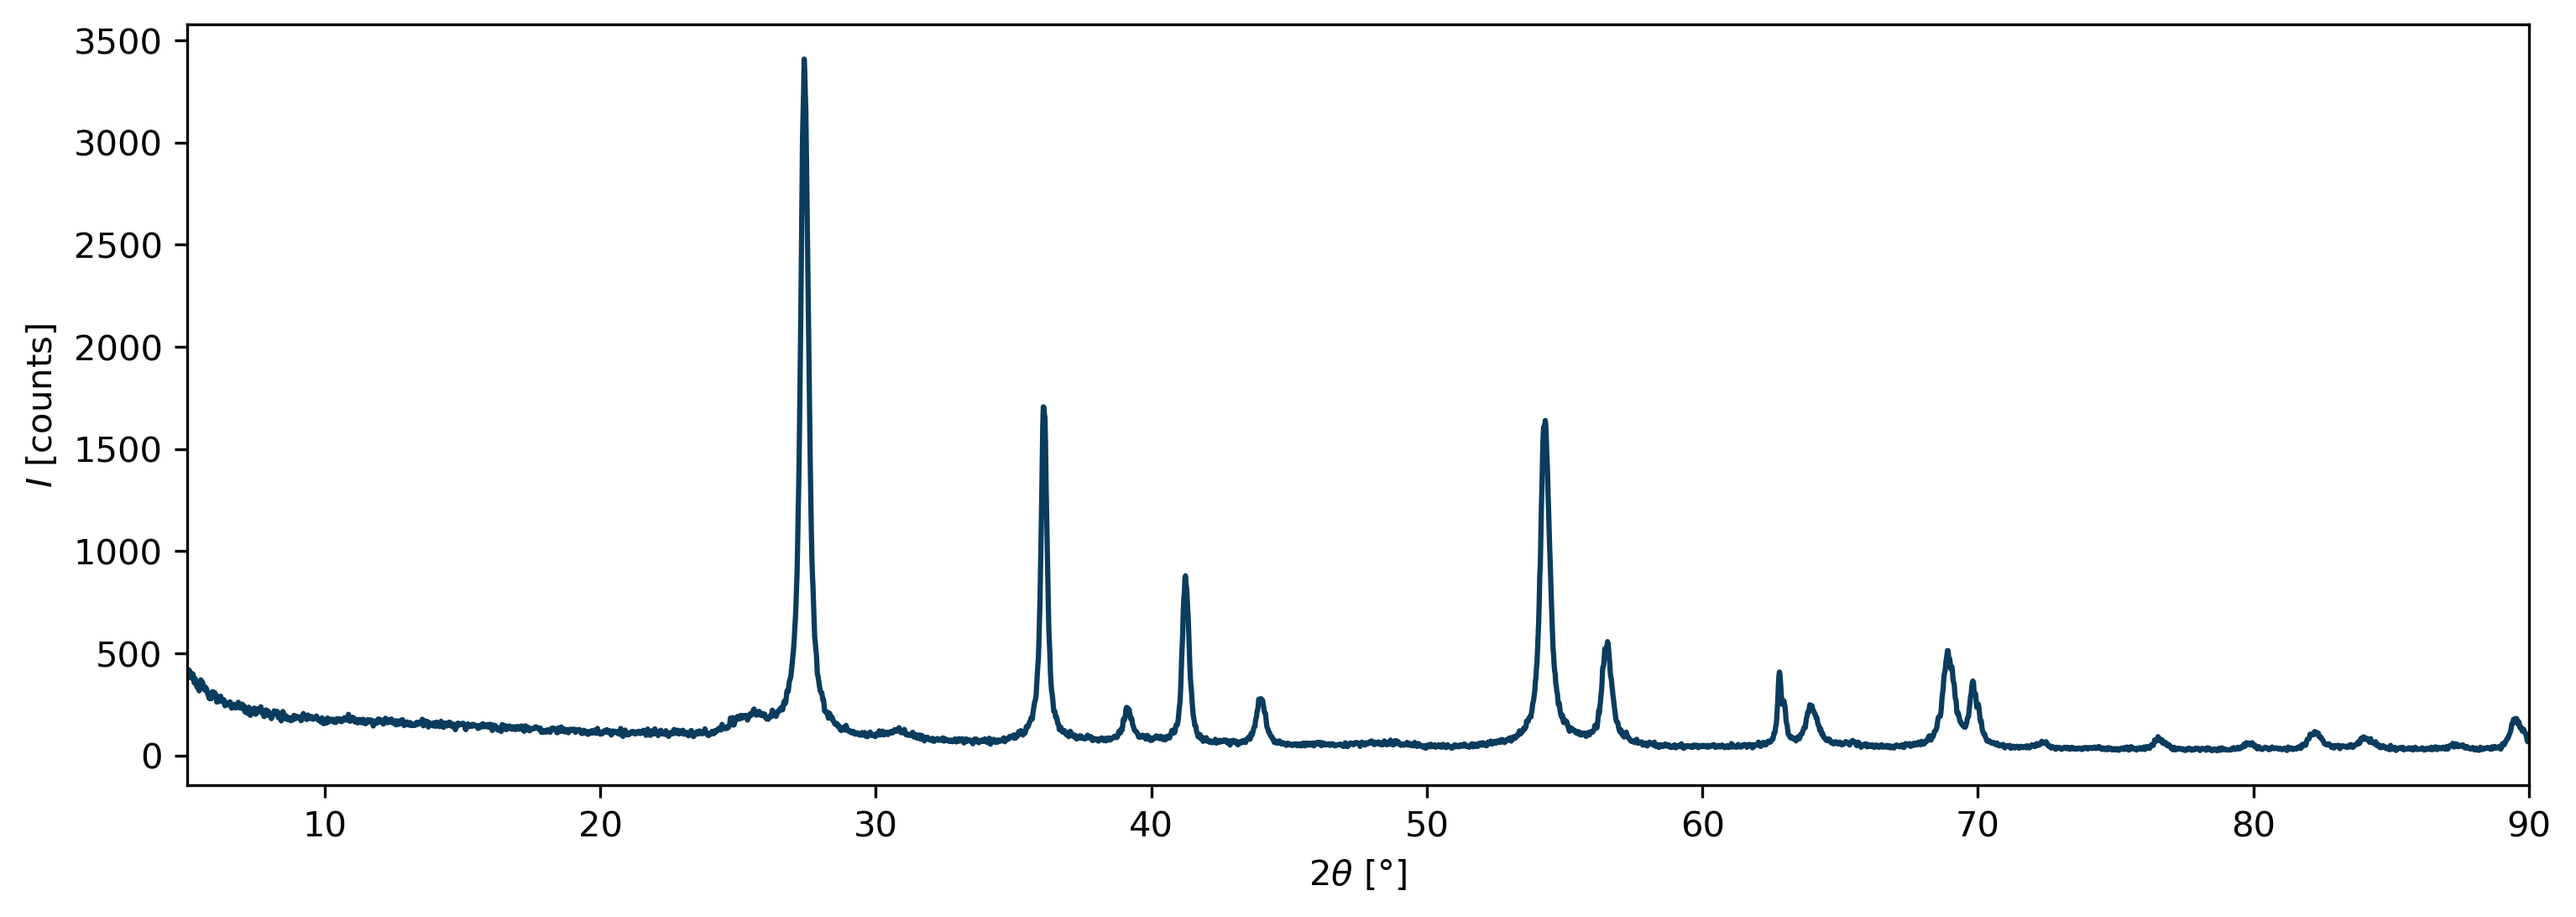

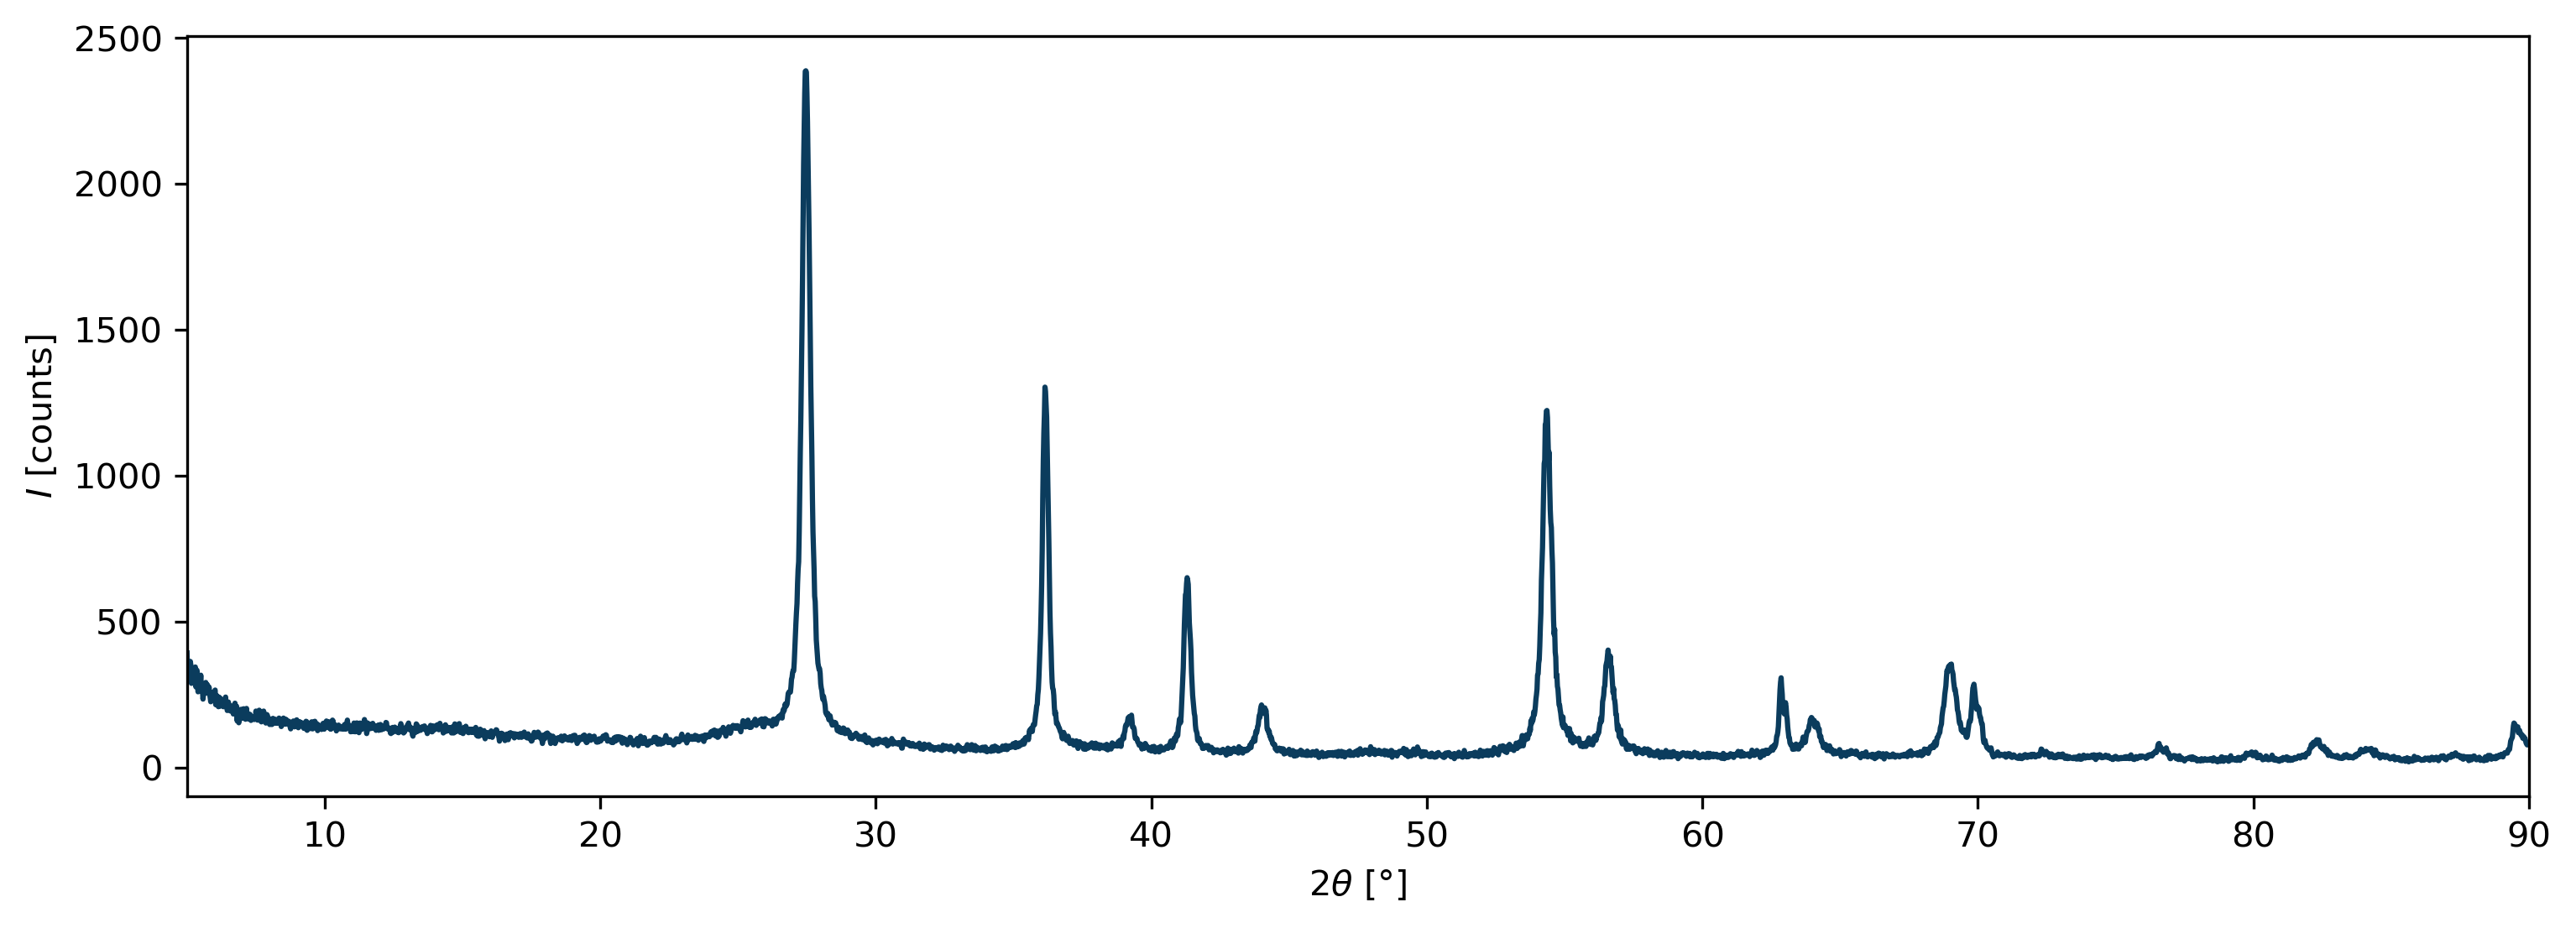

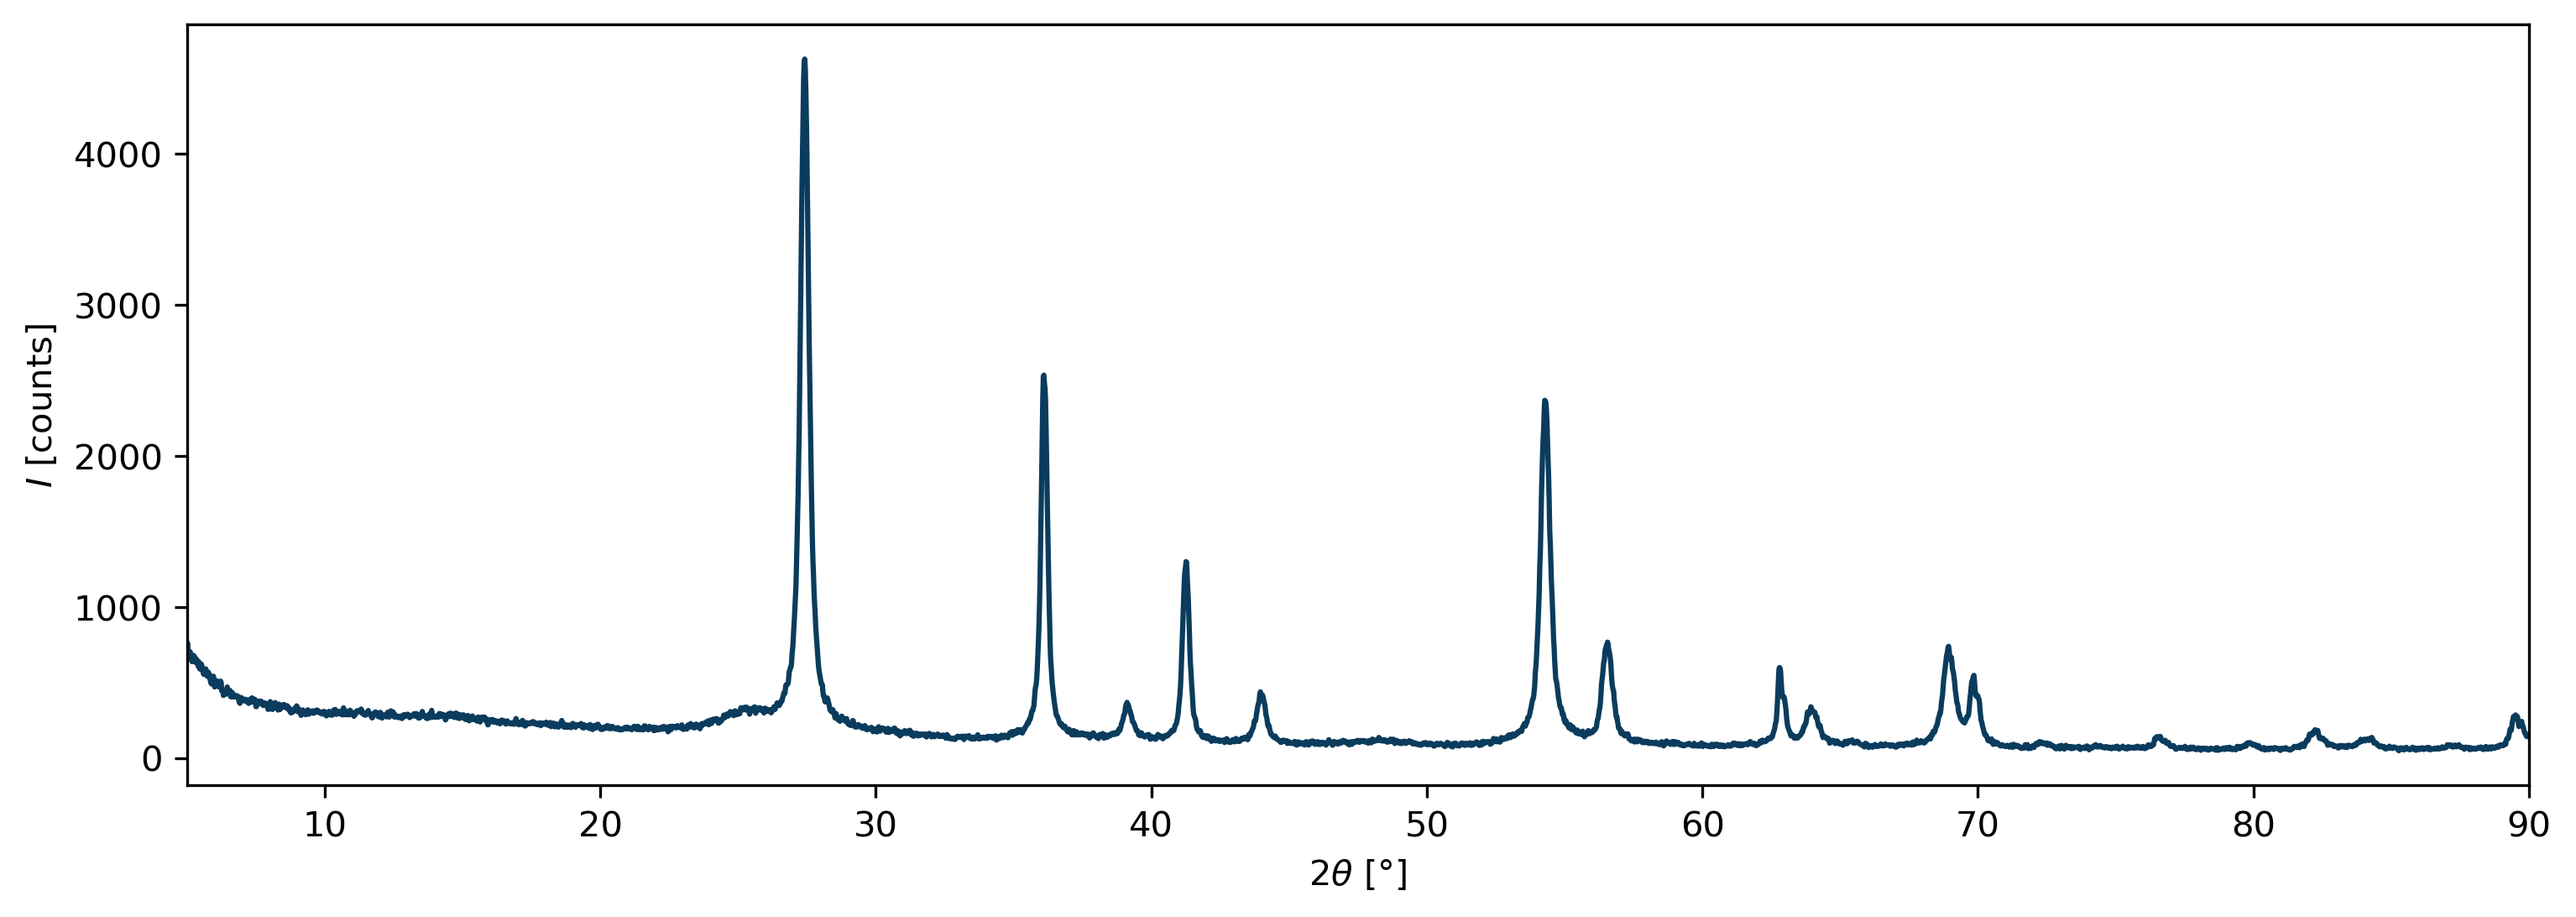

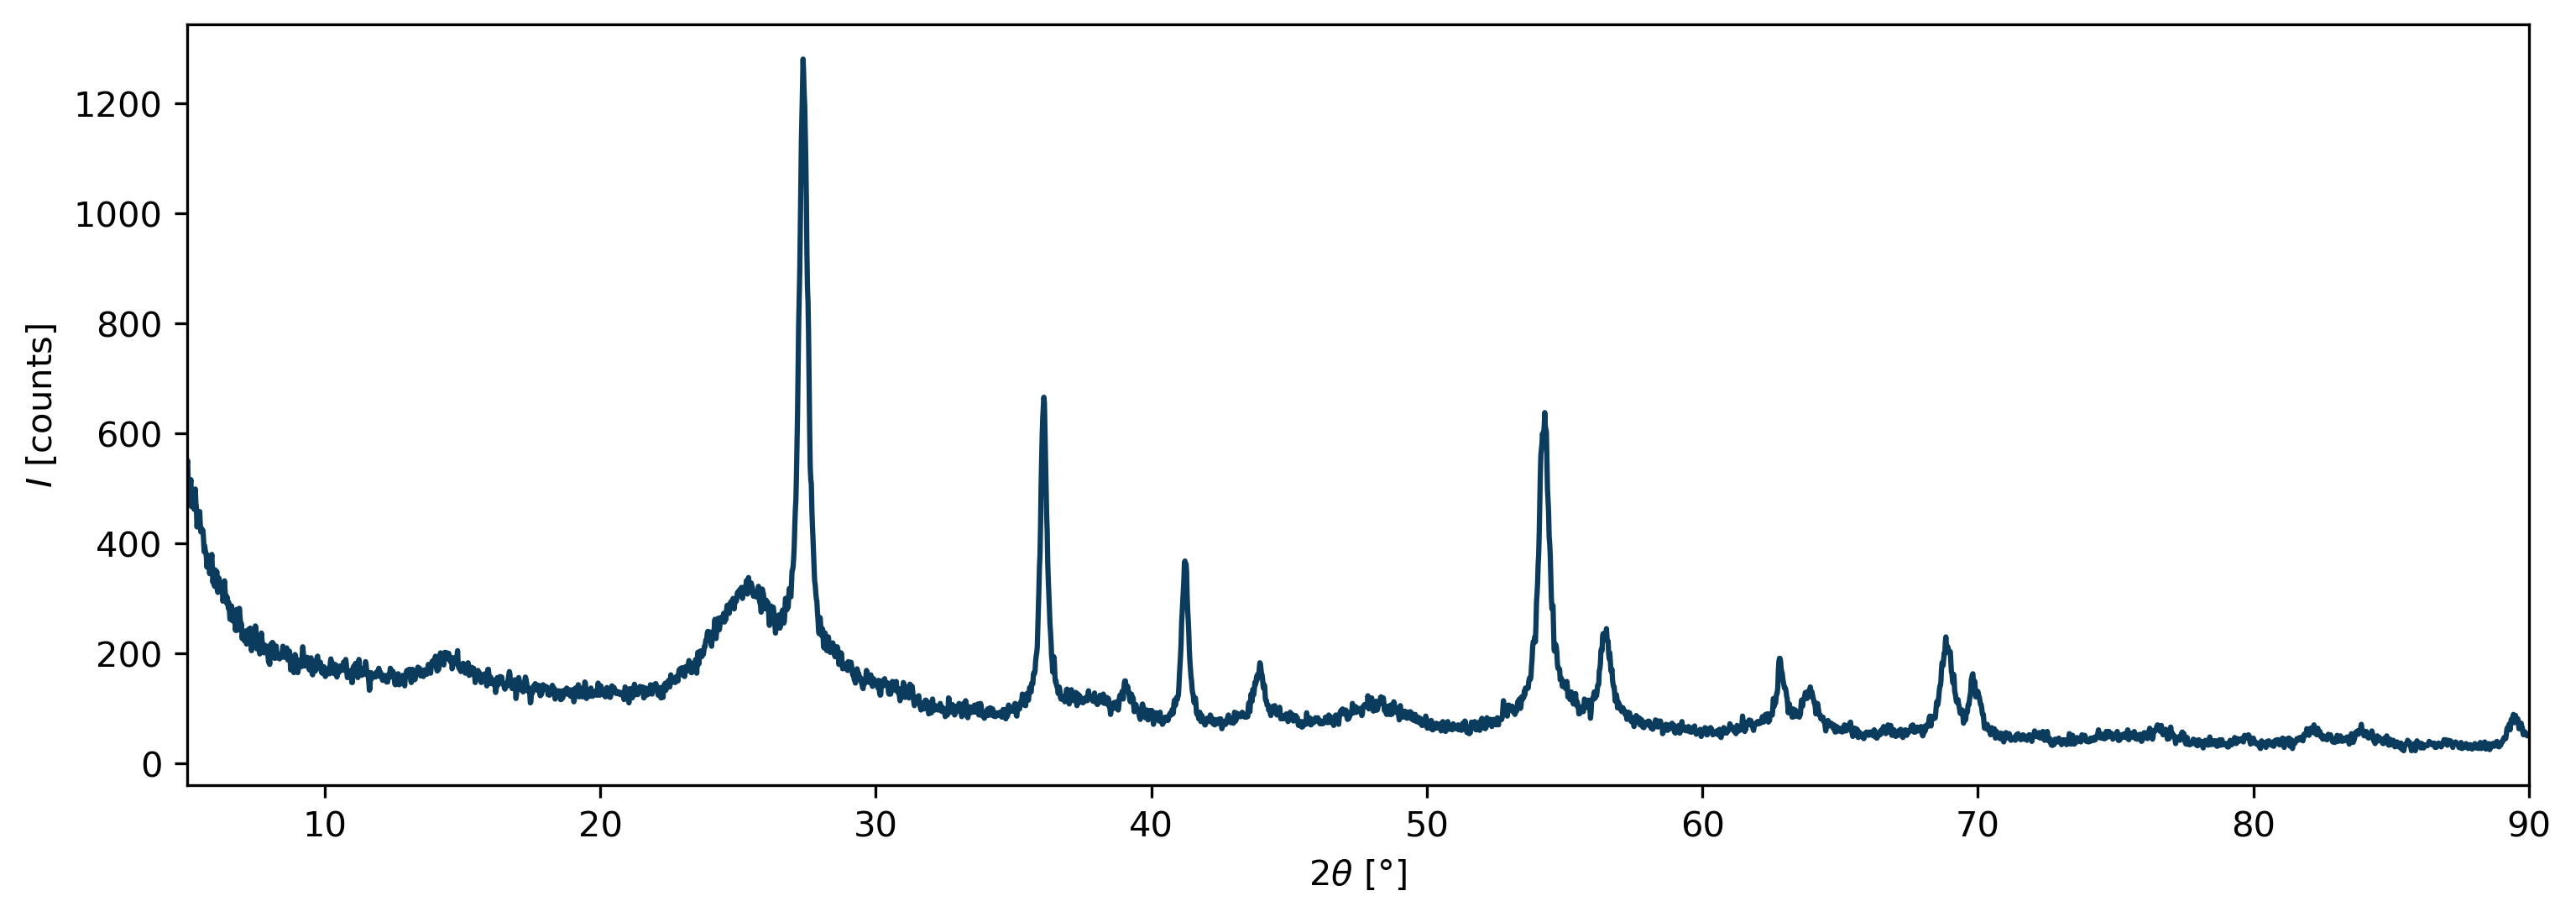

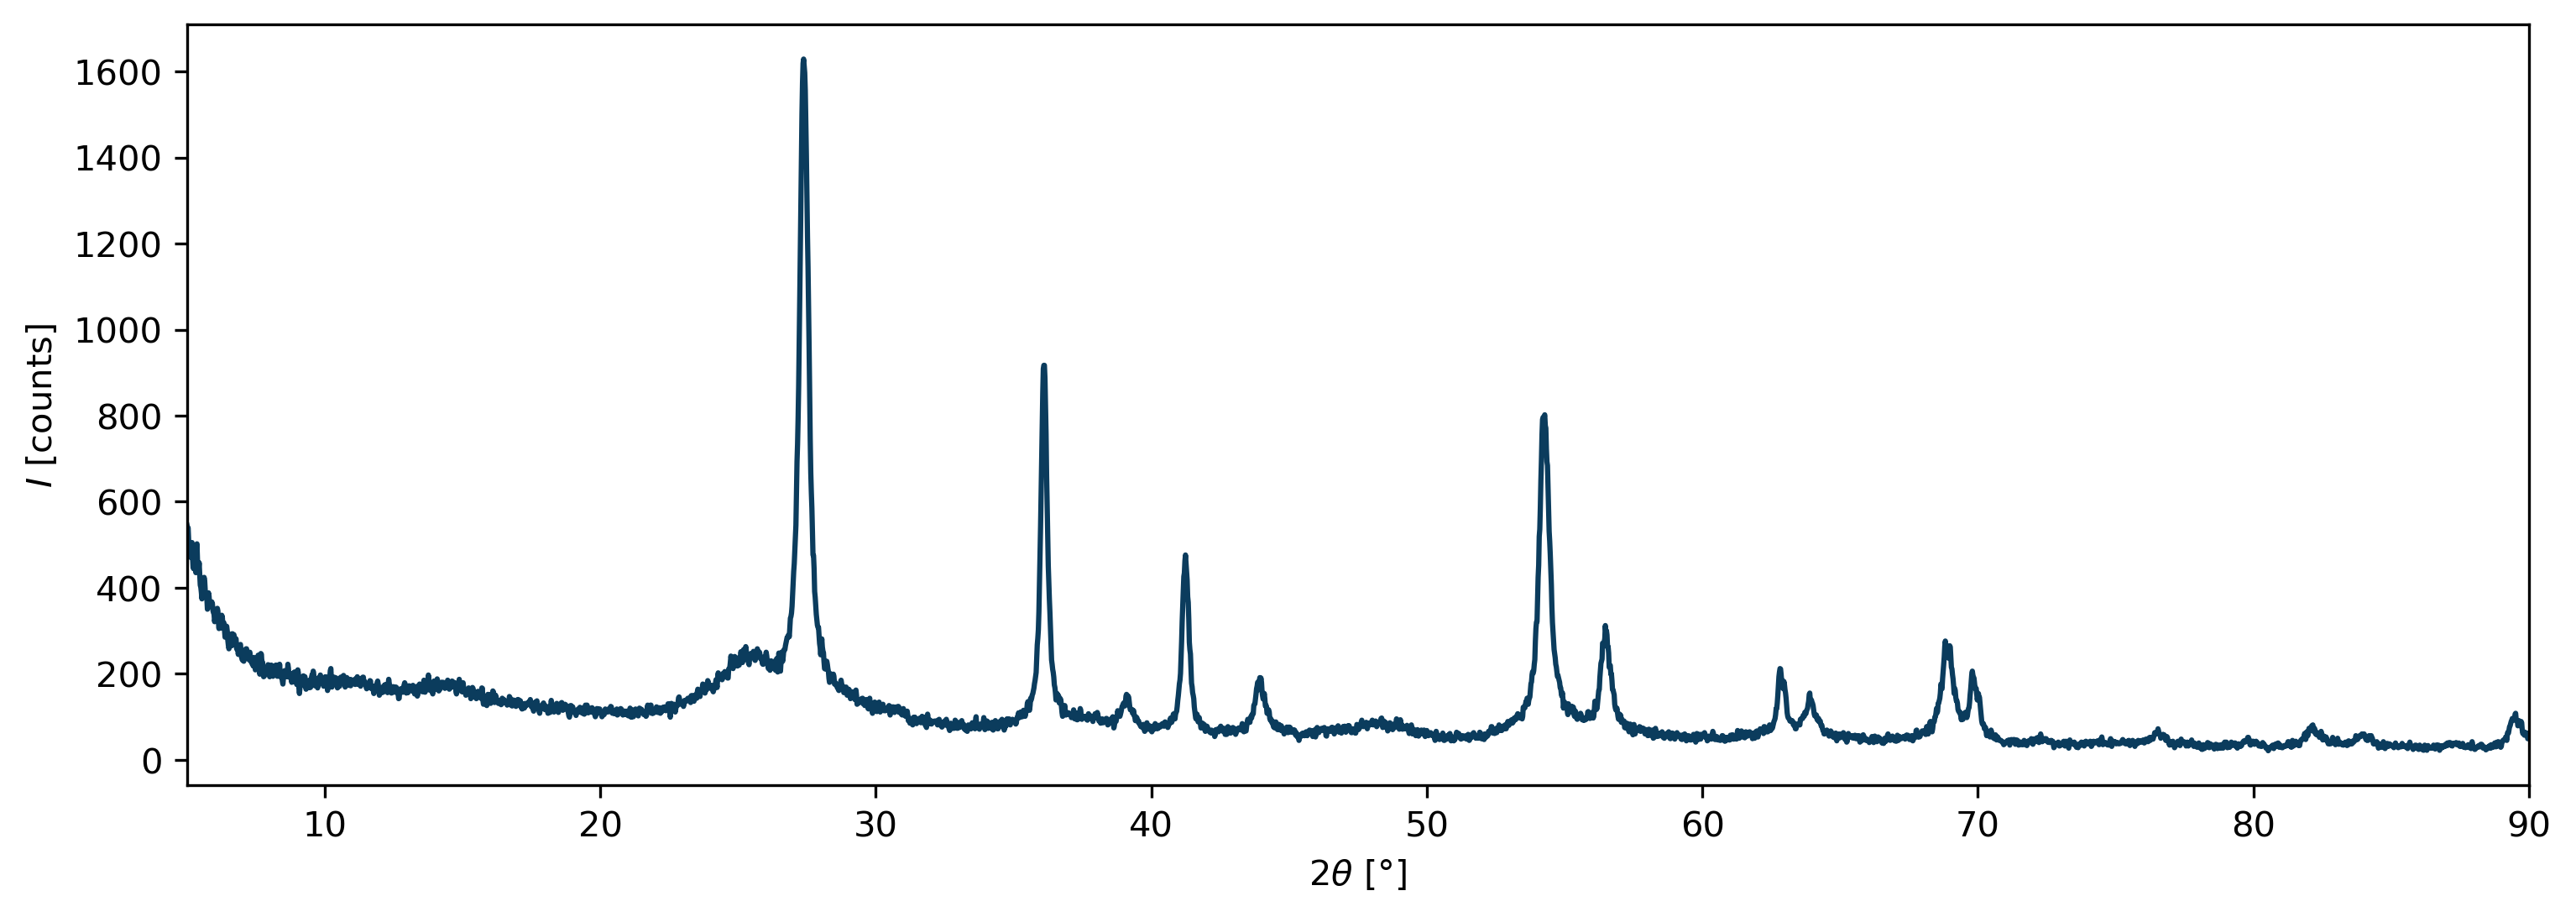

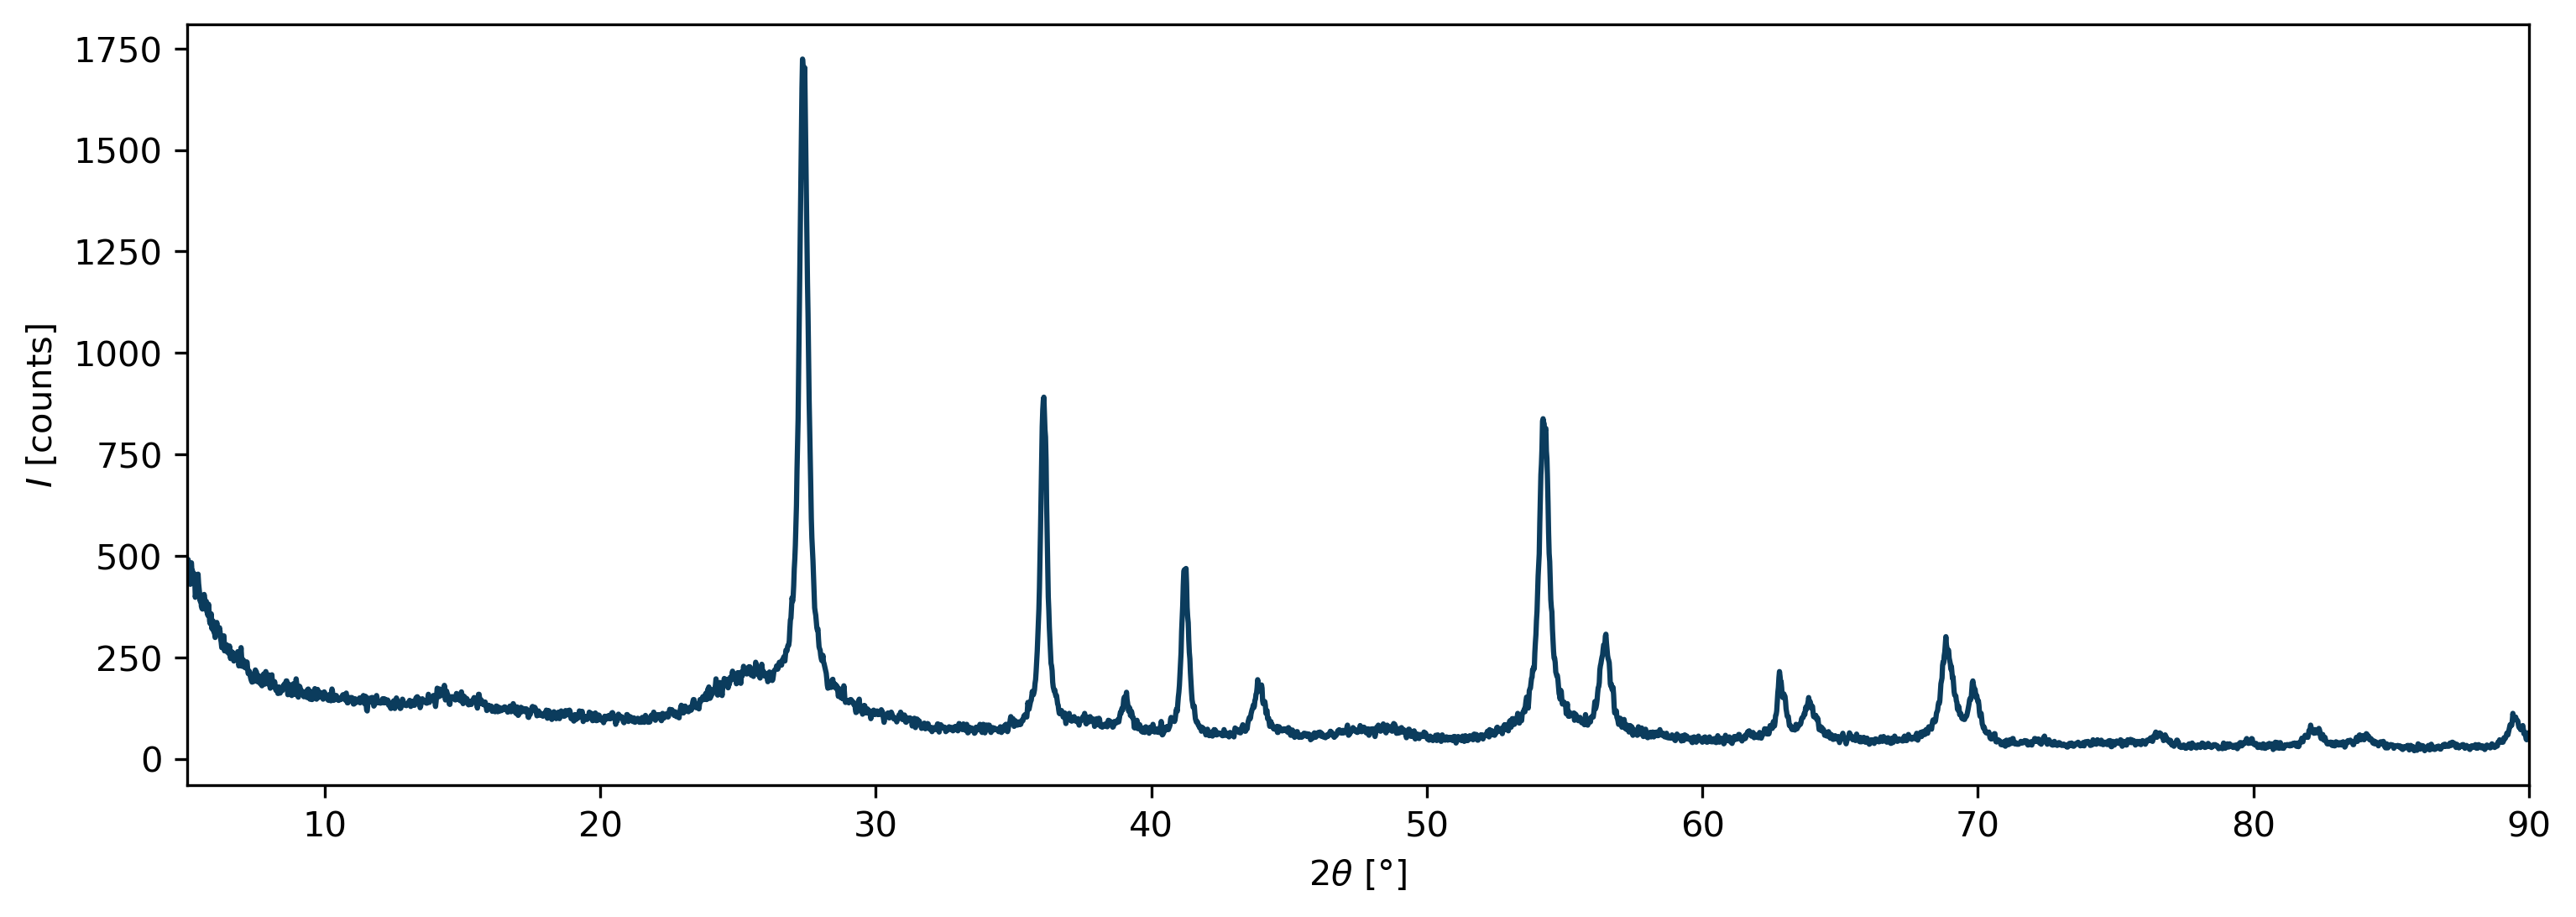

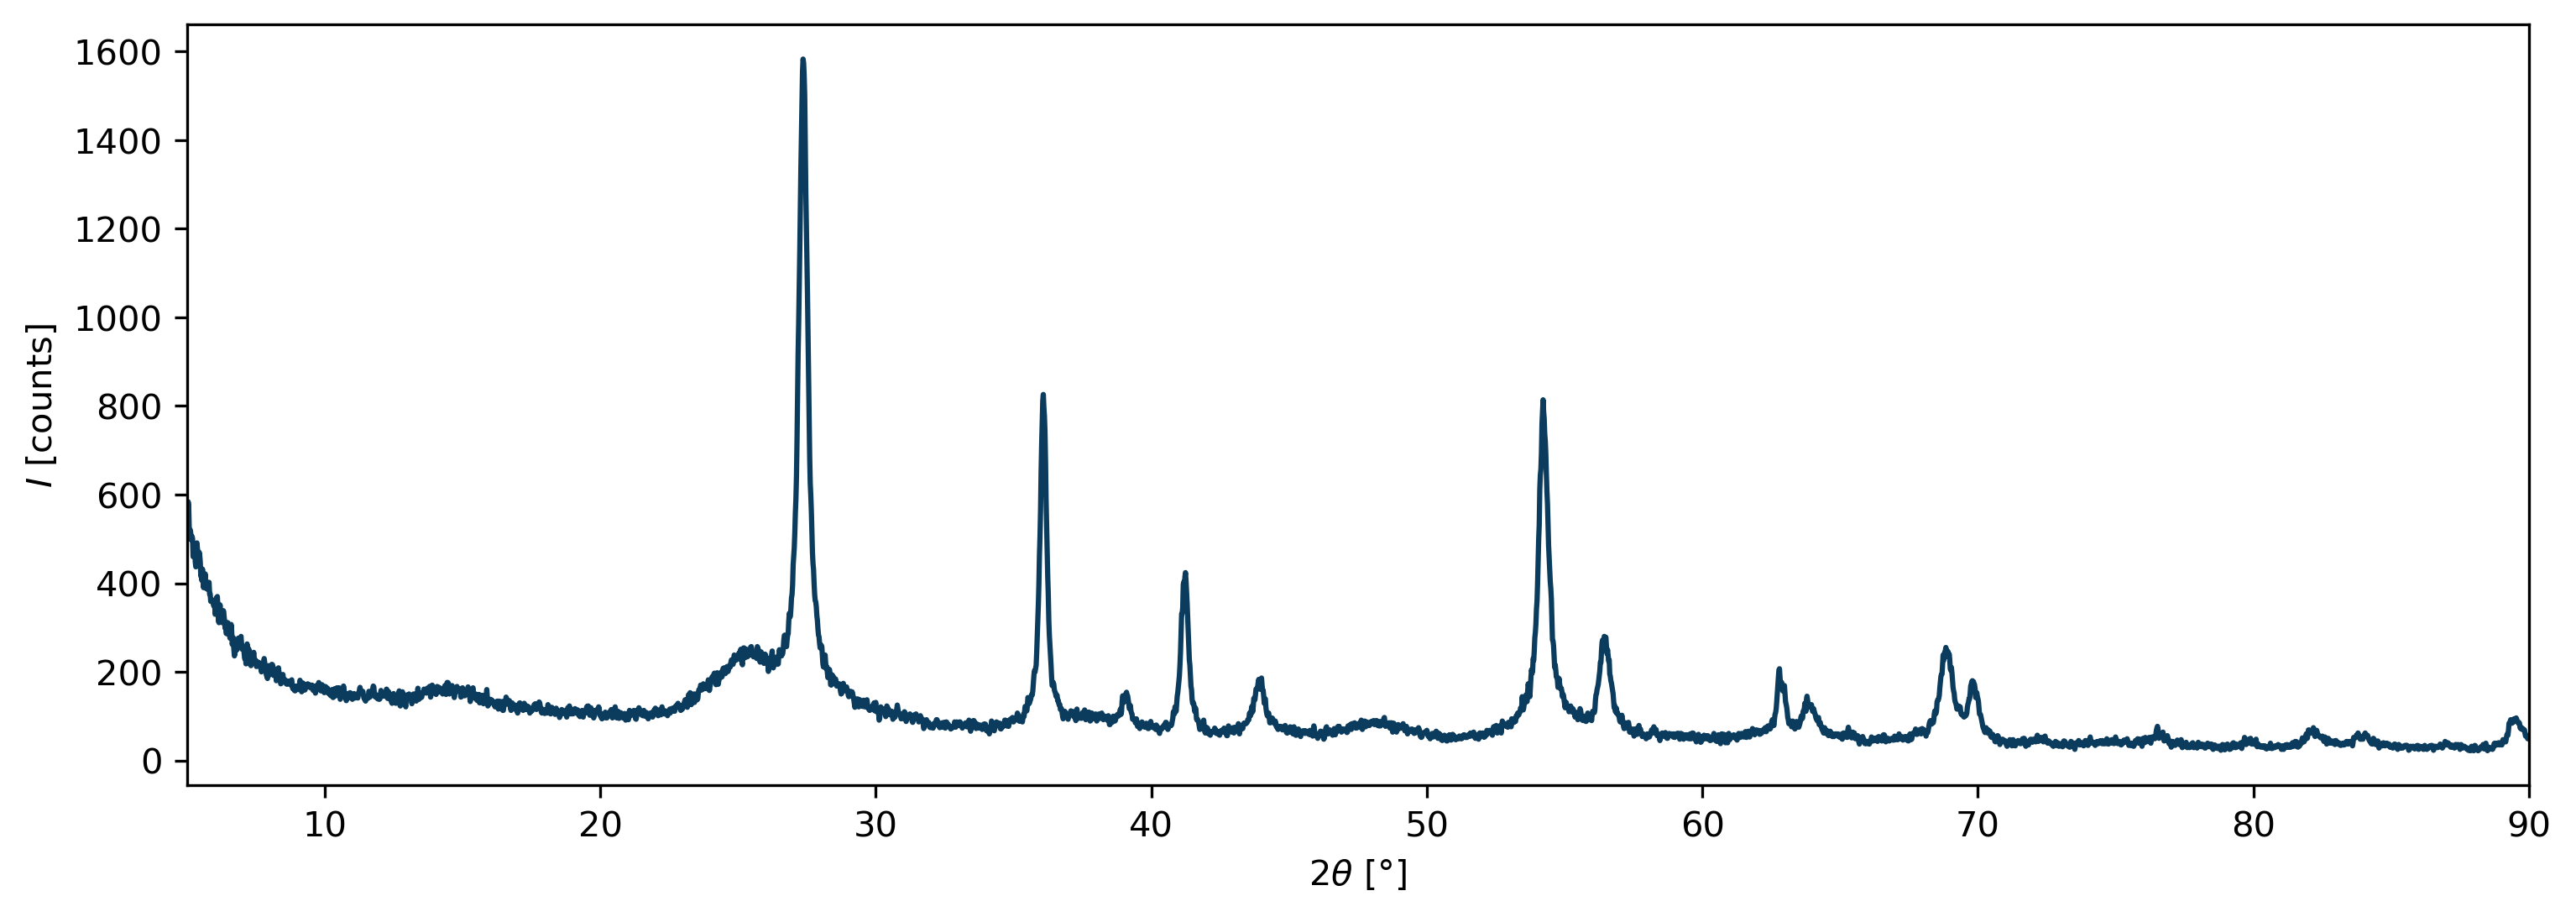

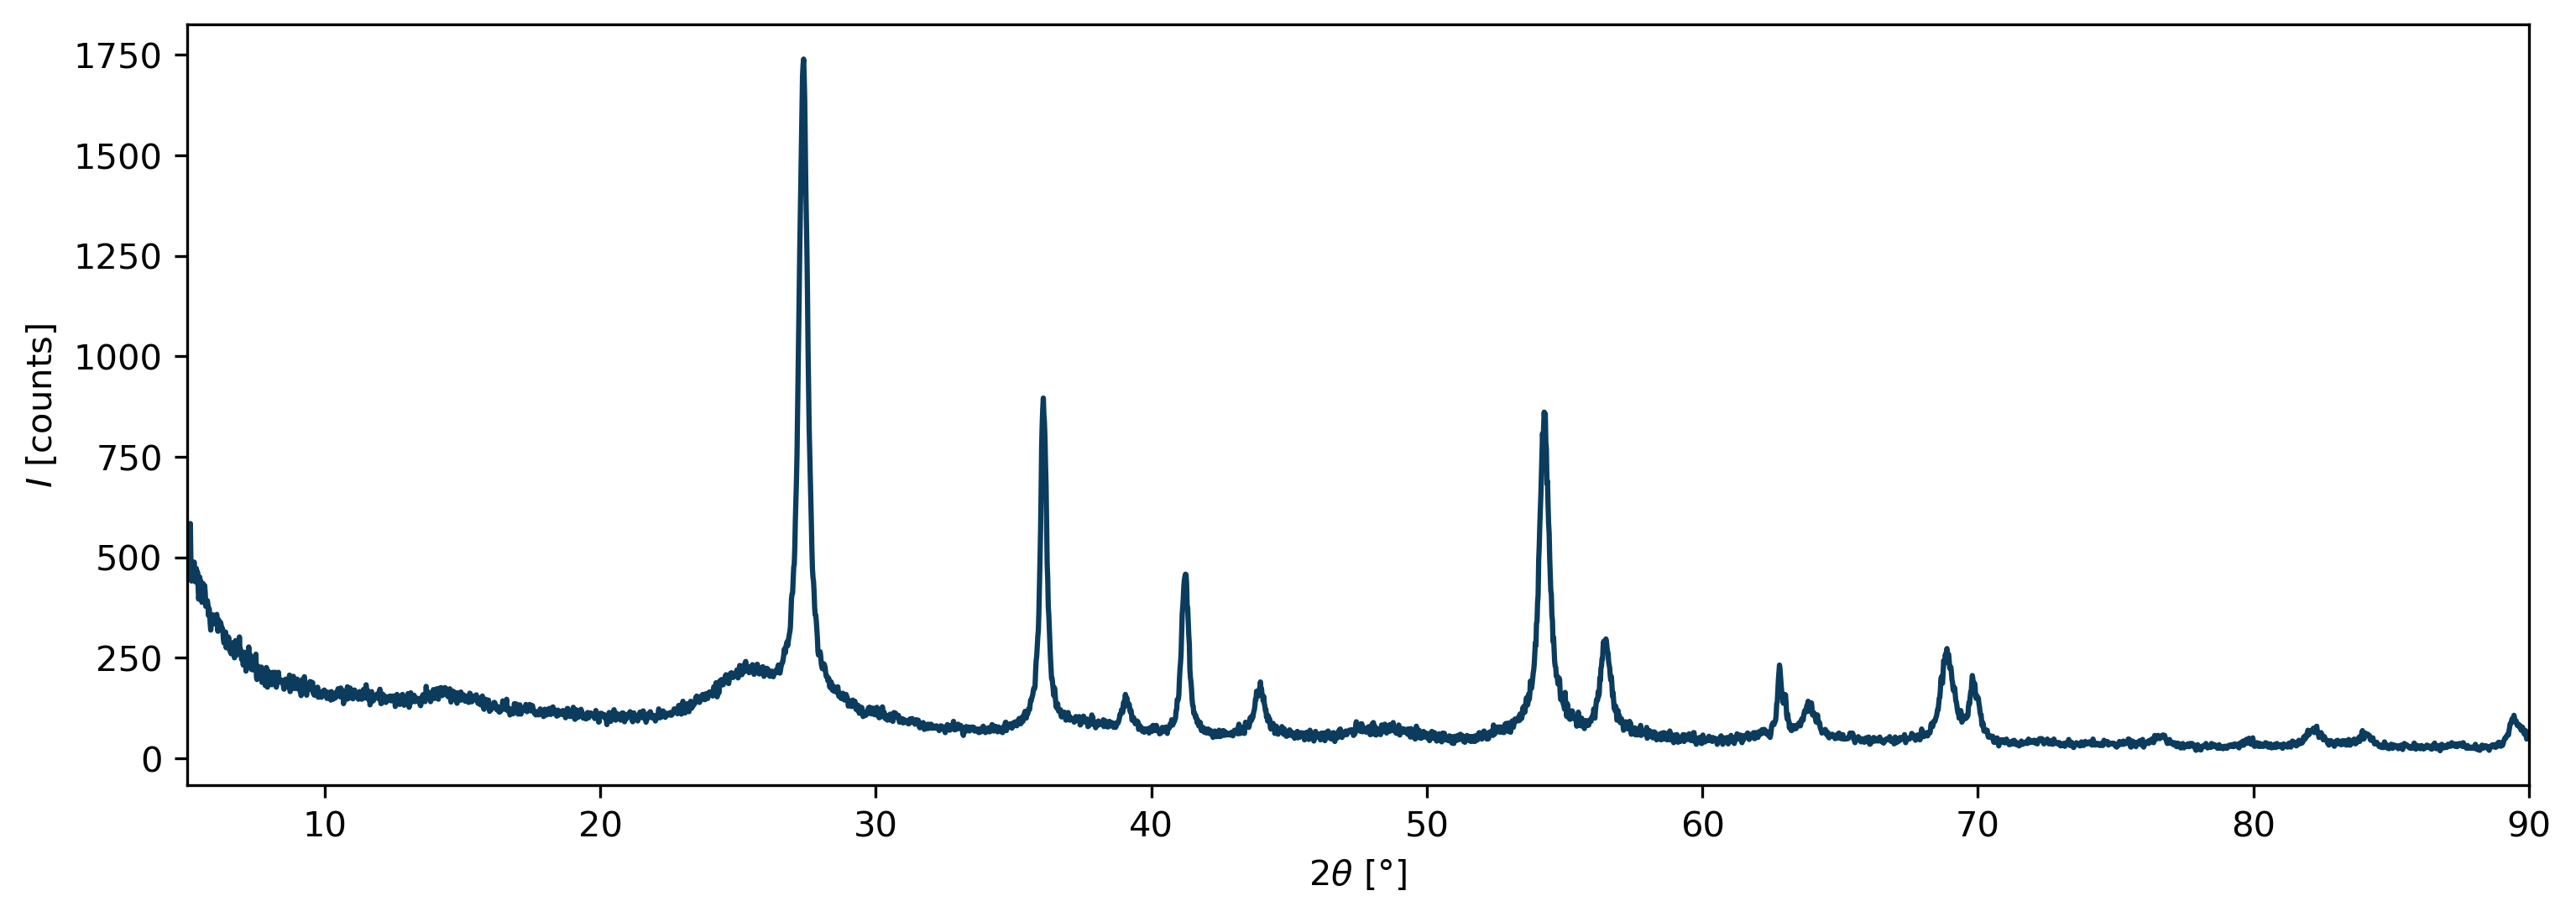

In [2]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import codecs

DPI = 300
FIGSIZE = (12,4)
FONTSIZE = 20

# Billinge group colors
bg_blue, bg_red, bg_green = '#0B3C5D', '#B82601', '#1c6b0a'
bg_lightblue, bg_darkblue, bg_yellow = '#328CC1', '#062F4F', '#D9B310'
bg_darkred, bg_bordeaux, bg_olivegreen = '#984B43', '#76323F', '#626E60'
bg_yellowgrey, bg_brownorange = '#AB987A', '#C09F80'

COLOR = bg_blue

def ras_to_csv_converter_plotter():
    if not (Path.cwd() / 'ras').exists():
        print(f"{90*'-'}\nPlease make a folder called 'ras' and place your files there.\
                \n{90*'-'}")
    files = list((Path.cwd() / 'ras').glob("*.ras"))
    if len(files) == 0:
        print(f"{90*'-'}\nPlease place your files in the 'ras' folder.\
                \n{90*'-'}")
    print(f"{90*'-'}\nConverting ras files to csv files and plotting...")
    folders = ['csv', 'png', 'pdf']
    for folder in folders:
        if not (Path.cwd() / folder).exists():
            (Path.cwd() / folder).mkdir()
    for e in files:
        filename = e.stem
        tt, int_exp = [], []
        with codecs.open(e, 'r', 'charmap') as f:
            lines = f.readlines()
        for i in range(0, len(lines)):
            if '*RAS_INT_START' in lines[i]:
                start = i + 1
            elif '*RAS_INT_END' in lines[i]:
                end = i
        for i in range(start, end):
            tt.append(float(lines[i].split()[0]))
            int_exp.append(float(lines[i].split()[1]))
        tt, int_exp = np.array(tt), np.array(int_exp)
        tt_int_exp = np.column_stack((tt, int_exp))
        np.savetxt(f"csv/{filename}.csv", tt_int_exp, delimiter=",", fmt="%.3f")
        plt.figure(dpi=DPI, figsize=FIGSIZE)
        plt.plot(tt, int_exp, c=COLOR)
        plt.xlim(np.amin(tt), np.amax(tt))
        plt.xlabel(r"$2\theta$ $[\degree]$")
        plt.ylabel(r"$I$ $[\mathrm{counts}]$")
        plt.savefig(f"png/{filename}.png", bbox_inches='tight')
        plt.savefig(f"pdf/{filename}.pdf", bbox_inches='tight')
    print(f"\nras files have been converted to csv files that are saved to the csv folder.\
            \nPlots have been saved to the png and pdf folders.\n{90*'-'}")
    return None

def main():
    ras_to_csv_converter_plotter()

    return None


if __name__ == "__main__":
    main()

# End of file.
